### Project outline: 

- Read data into Jupyter notebook, use pandas to import data into a data frame
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.
- Goal is to predict the **total transaction revenue**. 
- Decide aboute a good evaluation strategy and justify your choice.
- Split dataset into train and test dataset. 
- Choose two supervised learning model of your choice to train on train set. Use proper methods to find the best parameters. Evaluate your method on test data according to evaluation strategy. 
- Choose two unsupervised learning models, clustering, to train on your dataset. Discuss results. 
- Choose two unsupervised learning models, dimentionally reduction, and train it your dataset. Now use the same supervised learning models above on reduced dataset. Can you see any differences? Discuss the result. 
- Use a neural network model on your dataset. Compare the result with other two supervised learning models. Which model performs better? 

### Deliverables:
- Submit IPython notebook. Use markdown to provide an inline comments for this project.
- Submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization expected. 

### Dataset Description
This is an online Merchandise Store customer dataset. Goal is to predict the total transaction revenue. 
Each row in the dataset is one visit to the store. 

Data Fields
- fullVisitorId- A unique identifier for each user of the Google Merchandise Store.
- channelGrouping - The channel via which the user came to the Store.
- date - The date on which the user visited the Store.
- device - The specifications for the device used to access the Store.
- geoNetwork - This section contains information about the geography of the user.
- sessionId - A unique identifier for this visit to the store.
- socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".
- totals - This section contains aggregate values across the session.
- trafficSource - This section contains information about the Traffic Source from which the session originated.
- visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.
- visitNumber - The session number for this user. If this is the first session, then this is set to 1.
- visitStartTime - The timestamp (expressed as POSIX time).
- hits - This row and nested fields are populated for any and all types of hits. Provides a record of all page visits.
- customDimensions - This section contains any user-level or session-level custom dimensions that are set for a session. This is a repeated field and has an entry for each dimension that is set.

### Term Project

In [2]:
!pip install --upgrade pandas

Requirement already up-to-date: pandas in c:\anaconda\anaconda3\lib\site-packages (0.23.4)


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import json
from pandas.io.json import json_normalize

In [4]:
import ast
import copy
import math

In [5]:
from sklearn.preprocessing import StandardScaler

#### Reading the data into Jupyter notebook, using Pandas to import data into a data frame


In [6]:
df1 = pd.read_csv('C:/Users/Akshaye Nanglia/Desktop/FALL 2018/Programming for Data Science/Naseem/Project/New folder/data.csv',parse_dates=['date'], infer_datetime_format="%Y%m%d")

#### Removing Square Brackets ('[',']') from the CustomDimensions.

In [7]:
empty=[]
for index,row in df1['customDimensions'].iteritems():
    row1=row.replace('[]',"{'index': 'None', 'value': 'None'}")
    row2=row1.replace('[','')
    row3=row2.replace(']','')
    row4=ast.literal_eval(row3)
    empty.append(row4)

In [8]:
custDimension = pd.Series(empty)

#### Reading the data again in order to match the used file with the original file.


In [9]:
df0=pd.read_csv('C:/Users/Akshaye Nanglia/Desktop/FALL 2018/Programming for Data Science/Naseem/Project/New folder/data.csv')
df0["date"] = pd.to_datetime(df0["date"], format="%Y%m%d")

#### Pre-processing Data

In [10]:
df0.drop(['customDimensions'],axis=1,inplace=True)

In [11]:
df0=df0.merge(pd.DataFrame(custDimension), right_index=True, left_index=True)

In [12]:
df0=df0.rename(columns = {0:'customDimensions'})

In [13]:
def jsonColumn(d1):
    j2 = json.dumps(d1)
    j1 = json.loads(j2)
    return j1

In [14]:
def jsonColumn1(d1):
    data1=ast.literal_eval(d1)
    j2 = json.dumps(data1)
    j1 = json.loads(j2)
    return j1

#### Flattening the columns having the multiple values, into the separate columns.

In [15]:
import copy
dcustomDimensions = copy.deepcopy(df0['customDimensions'])
ddevice = copy.deepcopy(df0['device'])
dgeoNetwork = copy.deepcopy(df0['geoNetwork'])
dtrafficSource = copy.deepcopy(df0['trafficSource'])

In [16]:
dcustd = dcustomDimensions.apply(jsonColumn)
ddevice = ddevice.apply(jsonColumn1)
dgeoNetwork = dgeoNetwork.apply(jsonColumn1)
dtrafficSource = dtrafficSource.apply(jsonColumn1)

In [17]:
df0.drop(['customDimensions', 'device', 'geoNetwork','trafficSource'],axis=1,inplace=True)

In [18]:
df0=df0.merge(pd.DataFrame(dcustd), right_index=True, left_index=True)
df0=df0.merge(pd.DataFrame(ddevice), right_index=True, left_index=True)
df0=df0.merge(pd.DataFrame(dgeoNetwork), right_index=True, left_index=True)
df0=df0.merge(pd.DataFrame(dtrafficSource), right_index=True, left_index=True)

In [19]:
jcolumns = ['customDimensions', 'device', 'geoNetwork','trafficSource']

for column in jcolumns:
    column_df = json_normalize(df0[column])
    column_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_df.columns]
    df0 = df0.drop(column, axis=1).merge(column_df, right_index=True, left_index=True)


#### New columns generated out of the original columns after flattening.

In [20]:
df0.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'hits',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'totals_bounces', 'totals_hits', 'totals_newVisits', 'totals_pageviews',
       'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactionRevenue',
       'totals_transactions', 'totals_visits', 'customDimensions.index',
       'customDimensions.value', 'device.browser', 'device.browserSize',
       'device.browserVersion', 'device.deviceCategory', 'device.flashVersion',
       'device.isMobile', 'device.language', 'device.mobileDeviceBranding',
       'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName',
       'device.mobileDeviceModel', 'device.mobileInputSelector',
       'device.operatingSystem', 'device.operatingSystemVersion',
       'device.screenColors', 'device.screenResolution', 'geoNetwork.city',
       'geoNetwork.cityId', 'geoNetwork.continent', 'geoNetwork.country',
       

#### Exploring data, checking for missing data and applying data scaling.

In [93]:
counts = df1.loc[df1['totals_transactionRevenue'] > 0, 'fullVisitorId'].value_counts()
print('There are {0} no transactions in {1} total rows in data.'.format(df1['totals_transactionRevenue'].isnull().sum(), len(df1['totals_transactionRevenue'])))

print('There are {0} transactions among ({1} total) unique visitorID in data.'.format("193", df1['fullVisitorId'].nunique()))

print('There are {0} transactions in {1} rows in data.'.format(df1['totals_transactionRevenue'].notnull().sum(), len(df1['totals_transactionRevenue'])))

print('There are {0} unique paying visitorID among ({1} total) unique visitorIDs in the dataset.'.format(len(counts), df1['fullVisitorId'].nunique()))


There are 19807 no transactions in 20000 total rows in data.
There are 193 transactions among (18384 total) unique visitorID in data.
There are 193 transactions in 20000 rows in data.
There are 189 unique paying visitorID among (18384 total) unique visitorIDs in the dataset.


In [94]:
print('{0} visitorID ({1:.2f}% of paying) are paying for 1 transaction.'.format(np.sum(counts == 1), 100 * np.sum(counts == 1) / len(counts)))
print('{0} visitorID ({1:.2f}% of paying) are paying for 2 transactions.'.format(np.sum(counts == 2), 100 * np.sum(counts == 2) / len(counts)))
print('')

185 visitorID (97.88% of paying) are paying for 1 transaction.
4 visitorID (2.12% of paying) are paying for 2 transactions.



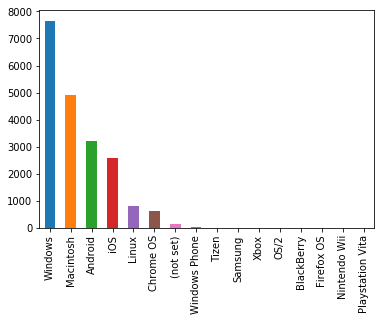

In [21]:
df0['device.operatingSystem'].value_counts().plot(kind='bar')

#### Windows Operating System is the one most widely used.

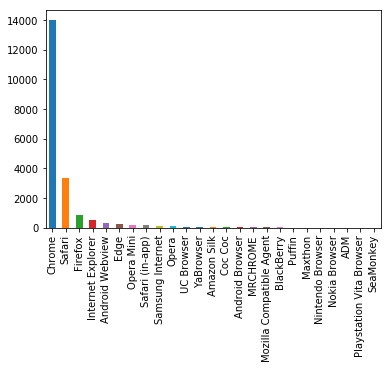

In [22]:
df0['device.browser'].value_counts().plot(kind='bar')

#### Chrome is the most widely used browser.

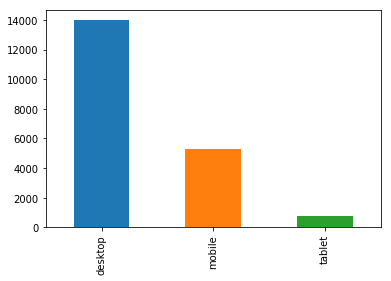

In [23]:
df0['device.deviceCategory'].value_counts().plot(kind='bar')

#### Desktop is on top in the Device Category.

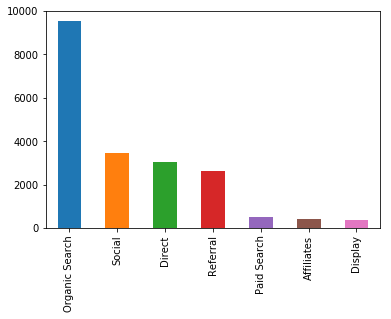

In [24]:
df0['channelGrouping'].value_counts().plot(kind='bar')

#### In Channel grouping, organic search is the one on top.

#### The below command will give the rows which are not Null.

In [26]:
df0['totals_transactionRevenue'].notnull().sum()

193

#### The below command will give the rows which are Null.

In [27]:
df0['totals_transactionRevenue'].isnull().sum()

19807

#### Heat-Map of Correlation Matrix 

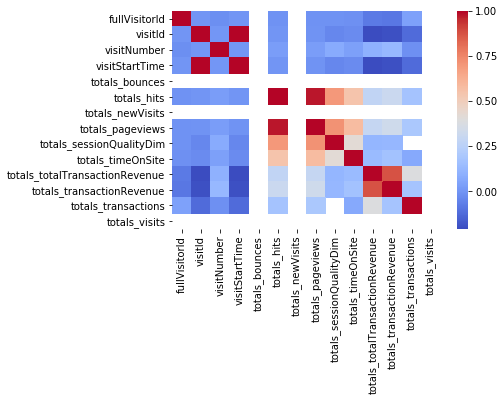

In [73]:
corr = df1.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='coolwarm')

#### Out target variable Totals_transactions is highly correlated with totals_totalTransactionRevenue

#### The below command is to flexibly plot a univariate distribution of 'totals_totalTransactionRevenue'.

C:\anaconda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 2160x1440 with 0 Axes>

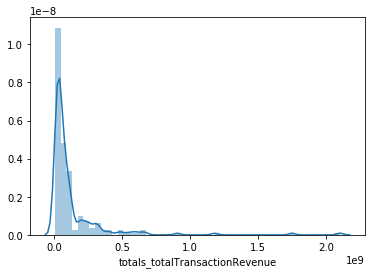

<Figure size 2160x1440 with 0 Axes>

In [28]:
sns.distplot(df0['totals_totalTransactionRevenue'][df0['totals_totalTransactionRevenue'].notnull()])
plt.figure(figsize=(30,20))

#### The below command generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.


In [29]:
df0['totals_totalTransactionRevenue'][df0['totals_totalTransactionRevenue'].notnull()].describe()

count    1.930000e+02
mean     1.278192e+08
std      2.432262e+08
min      4.990000e+06
25%      2.799000e+07
50%      5.171000e+07
75%      1.141600e+08
max      2.103690e+09
Name: totals_totalTransactionRevenue, dtype: float64

#### Imputing zero inplace of NaN

In [30]:
df0.fillna(0, inplace=True)

#### Using sklearn's MinMaxScaler because it bounds the value between zero and one.

In [31]:
X = copy.deepcopy(df1)
X.fillna(0, inplace=True)

y=X['totals_transactionRevenue']
X.drop(['customDimensions','totals_transactionRevenue','date','device','fullVisitorId','geoNetwork','hits','trafficSource', 'visitId', 'visitNumber', 'visitStartTime'],axis=1,inplace=True)
X = X.merge(df0[['geoNetwork.country','geoNetwork.metro','device.operatingSystem','geoNetwork.networkDomain','trafficSource.medium','trafficSource.isTrueDirect','trafficSource.campaign','trafficSource.keyword','trafficSource.source','geoNetwork.city']],right_index=True, left_index=True)
X = pd.get_dummies(X,drop_first=True)

In [32]:
X

,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions,totals_visits,channelGrouping_Direct,...,geoNetwork.city_Villafranca del Castillo,geoNetwork.city_Warsaw,geoNetwork.city_Washington,geoNetwork.city_Wroclaw,geoNetwork.city_Yokohama,geoNetwork.city_Zagreb,geoNetwork.city_Zaragoza,geoNetwork.city_Zhongli District,geoNetwork.city_Zurich,geoNetwork.city_not available in demo dataset
0,1.0,1,1.0,1.0,1.0,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,2,0.0,2.0,2.0,28.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,2,1.0,2.0,1.0,38.0,0.0,0.0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,0.0,2,1.0,2.0,1.0,1.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,2,1.0,2.0,1.0,52.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,0.0,2,1.0,2.0,2.0,12.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0.0,2,1.0,2.0,1.0,9.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0.0,2,1.0,2.0,1.0,15.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,0.0,2,1.0,2.0,1.0,34.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0.0,2,0.0,2.0,1.0,32.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1


#### Using MinMaxScaler() because it transforms features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one. Also, we have a mix of continuous and binary features.

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()
X[['totals_bounces', 'totals_hits', 'totals_newVisits', 'totals_pageviews',
       'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue',
       'totals_transactions', 'totals_visits']] = scaler.fit_transform(X[['totals_bounces', 'totals_hits', 'totals_newVisits', 'totals_pageviews',
       'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue',
       'totals_transactions', 'totals_visits']])

#### Decide about a good evaluation strategy and justify the choice.

#### This is a regression problem, as our target variable is continous. I decided to evaluate the model using Root Mean Squared Error(RMSE). The reasons for choosing it are:
    1. The errors are squared before they are averaged, therefore RMSE gives a relatively high weight to large errors.
    2. Also, R-Square tells us proportion of variance explained and it is not a good metrics in our case.
    3. RMSE is always positive and tells us on average by how much we missed the accurate value.
    4. RMSE does not necessarily increase with the variance of the errors. RMSE increases with the variance of the frequency   distribution of error magnitudes.

#### Split dataset into train and test dataset

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

#### Running 2 Supervised Learning Model to fit on train set.

#### Running first supervised model which is SGDRegressor.

In [37]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model.fit(X_train,y_train)

C:\anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [38]:
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

203521126148033.88

##### This is Root Mean Squared error for our first supervised model, which is SGDRegressor.

In [84]:
np.sqrt(203521126148033.88)

14266083.06957568

#### Running second supervised model which is Support Vector Machine (SVM).

In [40]:
from sklearn.svm import SVR
model = SVR(C=2, gamma=0.0001, kernel='rbf')

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print("RMSE for SVM:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("MSE for SVM:",mean_squared_error(y_test,y_pred))

RMSE for SVM: 15375206.263477502
MSE for SVM: 236396967644477.84


#### Linear Regression, it is not a good method to go with in this case. Running it in order to use the results for comparison.

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test,y_pred)))

1.5475665319645176e+16


#### Root Mean Squared error for Linear Regression.

In [95]:
np.sqrt(1.5475665319645176e+16)

124401227.1629391

#### As you can see the results are not reliable at all.

#### Two Unsupervised Learning Models

#### This is my first Unsupervised Model, which is Kmeans clustering.

In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [86]:
len(kmeans.cluster_centers_[3])

3102

In [85]:
kmeans.cluster_centers_[3]

array([ 4.13238952e-01,  2.15925072e-02,  6.17371341e-01, ...,
        1.14788598e-03,  1.91314329e-03, -5.44009282e-14])

In [71]:
print("Centroid for totals_totalTransactionRevenue for cluster 1: ",kmeans.cluster_centers_[:,6][0])
print("Centroid for totals_totalTransactionRevenue for cluster 2: ",kmeans.cluster_centers_[:,6][1])
print("Centroid for totals_totalTransactionRevenue for cluster 3: ",kmeans.cluster_centers_[:,6][2])
print("Centroid for totals_totalTransactionRevenue for cluster 4: ",kmeans.cluster_centers_[:,6][3])

Centroid for totals_totalTransactionRevenue for cluster 1:  0.000576741046127457
Centroid for totals_totalTransactionRevenue for cluster 2:  2.2659825404947043e-17
Centroid for totals_totalTransactionRevenue for cluster 3:  0.00026914986884656847
Centroid for totals_totalTransactionRevenue for cluster 4:  0.001357577918628416


#### As per the above plot, it looks like that four clusters are optimal for our data.

#### Elbow Method for Optimal K.

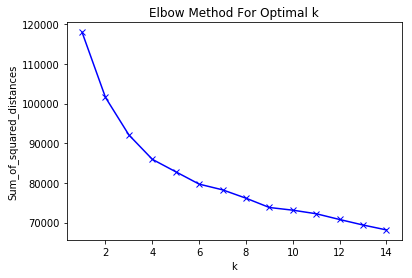

In [45]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### This is our second Unsupervised model, which is Gaussian Mixture.

In [46]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=7).fit(X)
labels = gmm.predict(X)

#### The average log likelihood for the given X is:

In [87]:
gmm.score(X)

16169.051663862247

In [88]:
print("Centroid for totals_totalTransactionRevenue for cluster 1: ",gmm.means_[0][6])
print("Centroid for totals_totalTransactionRevenue for cluster 2: ",gmm.means_[1][6])
print("Centroid for totals_totalTransactionRevenue for cluster 3: ",gmm.means_[2][6])
print("Centroid for totals_totalTransactionRevenue for cluster 4: ",gmm.means_[3][6])

Centroid for totals_totalTransactionRevenue for cluster 1:  0.00046786566586862454
Centroid for totals_totalTransactionRevenue for cluster 2:  0.00024181162239166756
Centroid for totals_totalTransactionRevenue for cluster 3:  0.0
Centroid for totals_totalTransactionRevenue for cluster 4:  0.0011733890540362348


#### Clusters' centroids for totals_totalTransactionRevenue are very close to each other

#### Dimensionality Reduction

#### This is my first model for Dimensionality Reduction, which is RFE.

In [49]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import rfe

In [50]:
RFE

sklearn.feature_selection.rfe.RFE

In [51]:
estimator = SGDRegressor() 
selector = RFE(estimator, 5, step=100)

In [52]:
selector.fit(X_train,y_train)

C:\anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\anaconda\Anaconda3\lib\site-packages\

C:\anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\anaconda\Anaconda3\lib\site-packages\

RFE(estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
  n_features_to_select=5, step=100, verbose=0)

In [53]:
fs = selector.support_
xc = X_train.columns
res = xc[fs]
print(res)

Index(['totals_hits', 'totals_pageviews', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactions'],
      dtype='object')


#### These are the top 5 columns that are helping the most in predicting the target variable

In [54]:
col = X.columns

In [55]:
col1 = list(col)

In [56]:
col1.remove('totals_timeOnSite')


In [57]:
col1.remove('totals_totalTransactionRevenue')
col1.remove('totals_transactions')

In [58]:
col1.remove('totals_pageviews')

In [59]:
col1.remove('totals_hits')

In [60]:
col1

['totals_bounces',
 'totals_newVisits',
 'totals_sessionQualityDim',
 'totals_visits',
 'channelGrouping_Direct',
 'channelGrouping_Display',
 'channelGrouping_Organic Search',
 'channelGrouping_Paid Search',
 'channelGrouping_Referral',
 'channelGrouping_Social',
 'geoNetwork.country_Afghanistan',
 'geoNetwork.country_Albania',
 'geoNetwork.country_Algeria',
 'geoNetwork.country_Angola',
 'geoNetwork.country_Argentina',
 'geoNetwork.country_Armenia',
 'geoNetwork.country_Australia',
 'geoNetwork.country_Austria',
 'geoNetwork.country_Azerbaijan',
 'geoNetwork.country_Bahrain',
 'geoNetwork.country_Bangladesh',
 'geoNetwork.country_Barbados',
 'geoNetwork.country_Belarus',
 'geoNetwork.country_Belgium',
 'geoNetwork.country_Benin',
 'geoNetwork.country_Bolivia',
 'geoNetwork.country_Bosnia & Herzegovina',
 'geoNetwork.country_Botswana',
 'geoNetwork.country_Brazil',
 'geoNetwork.country_Brunei',
 'geoNetwork.country_Bulgaria',
 'geoNetwork.country_Cambodia',
 'geoNetwork.country_Camero

In [61]:
X_reduced = X.drop(col1,axis=1,inplace=True)

In [62]:
X

,totals_hits,totals_pageviews,totals_timeOnSite,totals_totalTransactionRevenue,totals_transactions
0,0.000000,0.006061,0.000000,0.0,0.0
1,0.004386,0.012121,0.005042,0.0,0.0
2,0.004386,0.012121,0.006843,0.0,0.0
3,0.004386,0.012121,0.000180,0.0,0.0
4,0.004386,0.012121,0.009364,0.0,0.0
5,0.004386,0.012121,0.002161,0.0,0.0
6,0.004386,0.012121,0.001621,0.0,0.0
7,0.004386,0.012121,0.002701,0.0,0.0
8,0.004386,0.012121,0.006123,0.0,0.0
9,0.004386,0.012121,0.005763,0.0,0.0


### SVM

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)
model = SVR(C=2, gamma=0.0001, kernel='rbf')

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print("RMSE for SVM:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("MSE for SVM:",mean_squared_error(y_test,y_pred))

RMSE for SVM: 15375206.26349672
MSE for SVM: 236396967645068.75


### Result comparison for SVM

#### RMSE Value before Dimensionality Reduction is  15375206.263477502
#### RMSE Value after Dimensionality Reduction is 15375206.26349672

#### From the above mentioned results, we can say there is no effect on the model, that is the model's performance has not changed much.

### SGDRegressor

In [64]:
model = SGDRegressor()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print("RMSE for SGDR:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("MSE for SGDR:",mean_squared_error(y_test,y_pred))

RMSE for SGDR: 14387903.542492228
MSE for SGDR: 207011768348060.38


C:\anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


### Result comparison for SGDRegressor

#### RMSE Value before Dimensionality Reduction is 14266083.06957568
#### RMSE Value after Dimensionality Reduction is 14387903.542492228

#### From the above mentioned results, we can say that the model has become a little worse.

### This is my second model for Dimensionality Reduction, which is PCA.

In [65]:
X = copy.deepcopy(df1)
X.fillna(0, inplace=True)

y=X['totals_transactionRevenue']
X.drop(['customDimensions','totals_transactionRevenue','date','device','fullVisitorId','geoNetwork','hits','trafficSource', 'visitId', 'visitNumber', 'visitStartTime'],axis=1,inplace=True)
X = X.merge(df0[['geoNetwork.country','geoNetwork.metro','device.operatingSystem','geoNetwork.networkDomain','trafficSource.medium','trafficSource.isTrueDirect','trafficSource.campaign','trafficSource.keyword','trafficSource.source','geoNetwork.city']],right_index=True, left_index=True)
X = pd.get_dummies(X,drop_first=True)
scaler = MinMaxScaler()
X[['totals_bounces', 'totals_hits', 'totals_newVisits', 'totals_pageviews',
       'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue',
       'totals_transactions', 'totals_visits']] = scaler.fit_transform(X[['totals_bounces', 'totals_hits', 'totals_newVisits', 'totals_pageviews',
       'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue',
       'totals_transactions', 'totals_visits']])


In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

#### Values after DImension Reduction

In [67]:
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (20000, 3102)
transformed shape: (20000, 4)


### SVM

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=50)
model = SVR(C=2, gamma=0.0001, kernel='rbf')

model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print("RMSE for SVM:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("MSE for SVM:",mean_squared_error(y_test,y_pred))

RMSE for SVM: 15375206.264029495
MSE for SVM: 236396967661451.8


### Result comparison for SVM
#### RMSE Value before Dimensionality Reduction is 15375206.263477502
#### RMSE Value after Dimensionality Reduction is 15375206.264029495
#### From the above mentioned results, we can say that there is no effect on the model, that is the model's performance has not changed much.

### SGDRegressor

In [69]:
model = SGDRegressor()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print("RMSE for SGDR:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("MSE for SGDR:",mean_squared_error(y_test,y_pred))

RMSE for SGDR: 15242540.179439764
MSE for SGDR: 232335031121835.6


C:\anaconda\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


### Result comparison for SGDRegressor

#### RMSE Value before Dimensionality Reduction is 14266083.06957568
#### RMSE Value after Dimensionality Reduction is 15242540.179439764

#### From the above mentioned results, we can say that the model has become worse.